## AI & Machine Learning for Data Quality
**Description**: AI and machine learning can automate and enhance data quality checks by learning patterns and identifying anomalies more effectively than static rules.

**Task 1**: Training a model to predict and flag unusual trend patterns in sales data that
deviate from historical norms.

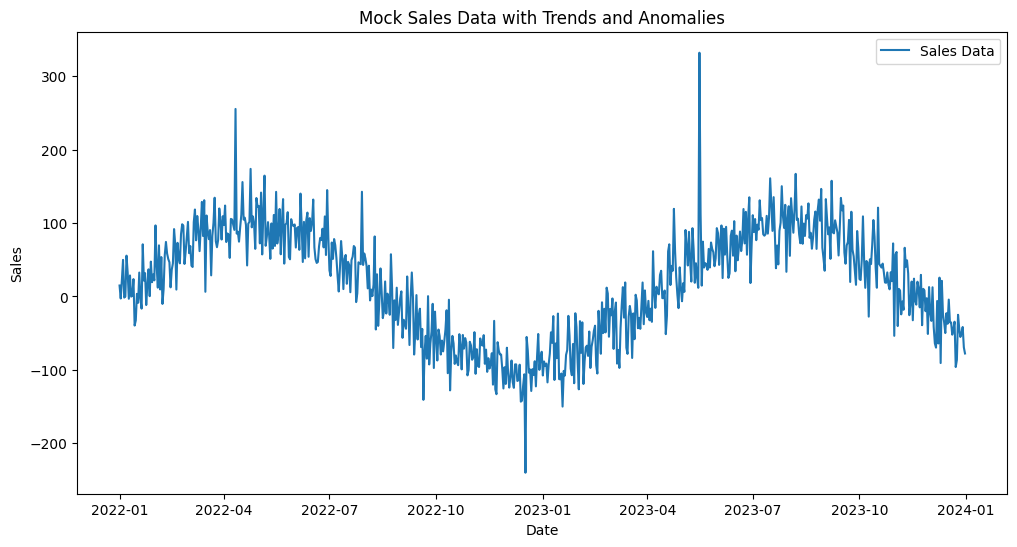

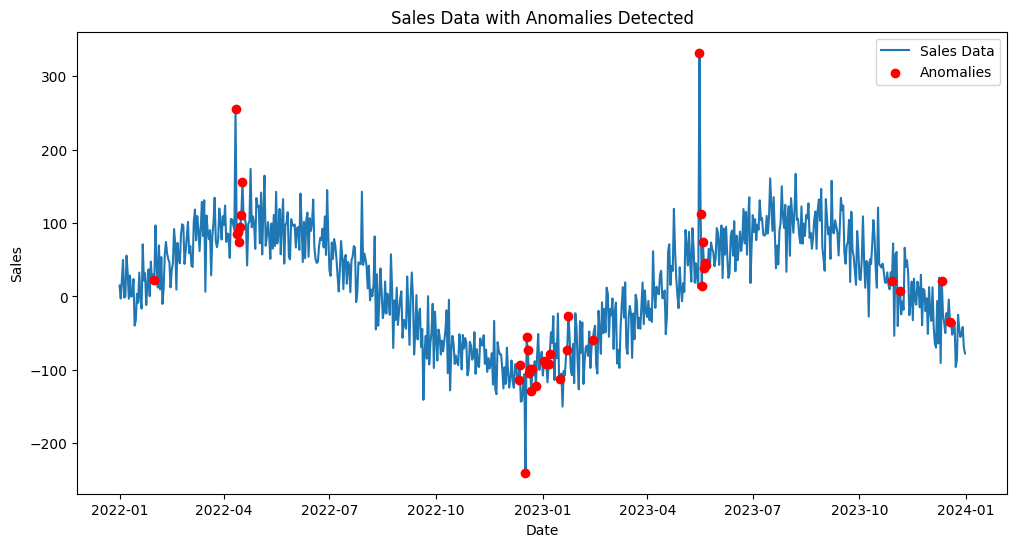

In [2]:
# write your code from here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Seed for reproducibility
np.random.seed(42)

# Generate mock sales data over 2 years (730 days)
dates = pd.date_range(start="2022-01-01", periods=730, freq="D")
sales = np.sin(np.linspace(0, 10, 730)) * 100 + np.random.normal(0, 30, 730)  # Sine wave trend + noise

# Introduce some anomalies (outliers)
sales[100] += 200
sales[350] -= 150
sales[500] += 250

# Create a DataFrame
df_sales = pd.DataFrame({"date": dates, "sales": sales})

# Visualize the sales data
plt.figure(figsize=(12, 6))
plt.plot(df_sales['date'], df_sales['sales'], label="Sales Data")
plt.title("Mock Sales Data with Trends and Anomalies")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.show()

df_sales.head()
# Add rolling mean and rolling standard deviation
# Ensure that we drop NaN values only from the features DataFrame, and keep the index aligned
df_sales['rolling_mean'] = df_sales['sales'].rolling(window=7).mean()  # 7-day moving average
df_sales['rolling_std'] = df_sales['sales'].rolling(window=7).std()  # 7-day moving standard deviation

# Add additional time-based features
df_sales['day_of_week'] = df_sales['date'].dt.dayofweek  # 0=Monday, 6=Sunday
df_sales['month'] = df_sales['date'].dt.month

# Drop rows where the rolling mean or rolling std has NaN values (the first 6 rows)
features = df_sales[['rolling_mean', 'rolling_std', 'day_of_week', 'month']].dropna()

# Initialize and train the Isolation Forest model
model = IsolationForest(contamination=0.05)  # 5% contamination (anomalies)
model.fit(features)

# Predict anomalies: -1 for anomaly, 1 for normal
anomaly_predictions = model.predict(features)

# Map the anomaly predictions back to the original dataframe
df_sales.loc[features.index, 'anomaly'] = anomaly_predictions

# Convert anomaly column to 0 and 1 for better interpretation (0 = normal, 1 = anomaly)
df_sales['anomaly'] = df_sales['anomaly'].apply(lambda x: 1 if x == -1 else 0)

# Visualize the anomalies
plt.figure(figsize=(12, 6))
plt.plot(df_sales['date'], df_sales['sales'], label="Sales Data")
plt.scatter(df_sales[df_sales['anomaly'] == 1]['date'], 
            df_sales[df_sales['anomaly'] == 1]['sales'], 
            color='red', label="Anomalies", zorder=5)
plt.title("Sales Data with Anomalies Detected")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.show()



**Task 2**: Using clustering algorithms to detect duplicate records where entries are not
exactly identical.

In [3]:
# write your code from here

**Task 3**: Implementing classification models to validate data based on learned
characteristics from labeled datasets.

In [4]:
# write your code from here
